# 6.2 Exploratory Analysis

## This notebook contains:
1. Importing Libraries and Data
2. Data Consistency Check
3. Exploring Relationships throught Visualizations

 - CORRELATIONS
 - SCATTERPLOTS
 - PAIR PLOTS
 - CATEGORICAL PLOTS
 
4. Key questions & Hypothesis formulation

## 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
matplotlib.__version__

'3.7.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path

path = 'C:/Users/hachl/Downloads/OpenProject'

In [5]:
# Import data

df = pd.read_csv(os.path.join(path,'DataWHR_Merged.csv'))

### I merged the 2023 Report into the data set file reporting previous years. Missing 2023 observations for 'positive affect' and 'negative affect' variables were filled with mean value of previous years for each country (i.e. average of positive affect from 2008 to 2022 for Senegal is the estimation for said country in 2023).

## 02. Data Consistency Check

In [6]:
# Check shape

df.shape # 11 columns from 'All_rankings' & sum of rows of the two data sets are correct

(2336, 11)

In [7]:
# Check first 10 rows

df.head(10)

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.168,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.191,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.121,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.164,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.238,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.063,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.106,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.082,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.044,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.119,0.954,0.435,0.371


In [8]:
# Check for missing values

df.isnull().sum() # zero missing values

Country name                        0
Year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [9]:
# Find duplicates

df_dups = df[df.duplicated()]

In [10]:
df_dups # no duplicates found

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect


#### Our dataframe is clean and ready for analysis!

## 03. Exploring Relationships throught Visualizations

### CORRELATIONS

In [11]:
# Pick out only relevant variables (remove country name and year)

df_subset = df.loc[:, ~df.columns.isin(['Country name', 'Year'])]

In [12]:
# Create a correlation matrix using pandas

df_subset.corr()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Life Ladder,1.000000,0.779060,0.726140,0.710978,0.537737,0.170917,-0.426951,0.513809,-0.342872
Log GDP per capita,0.779060,1.000000,0.677082,0.807991,0.365377,-0.008990,-0.348352,0.233979,-0.248331
Social support,0.726140,0.677082,1.000000,0.599160,0.411276,0.064525,-0.222300,0.424157,-0.440689
Healthy life expectancy at birth,0.710978,0.807991,0.599160,1.000000,0.372403,0.006109,-0.296233,0.220281,-0.143413
Freedom to make life choices,0.537737,0.365377,0.411276,0.372403,1.000000,0.312986,-0.462125,0.572955,-0.276321
Generosity,0.170917,-0.008990,0.064525,0.006109,0.312986,1.000000,-0.262728,0.296532,-0.080763
Perceptions of corruption,-0.426951,-0.348352,-0.222300,-0.296233,-0.462125,-0.262728,1.000000,-0.276931,0.266034
Positive affect,0.513809,0.233979,0.424157,0.220281,0.572955,0.296532,-0.276931,1.000000,-0.332450
Negative affect,-0.342872,-0.248331,-0.440689,-0.143413,-0.276321,-0.080763,0.266034,-0.332450,1.000000


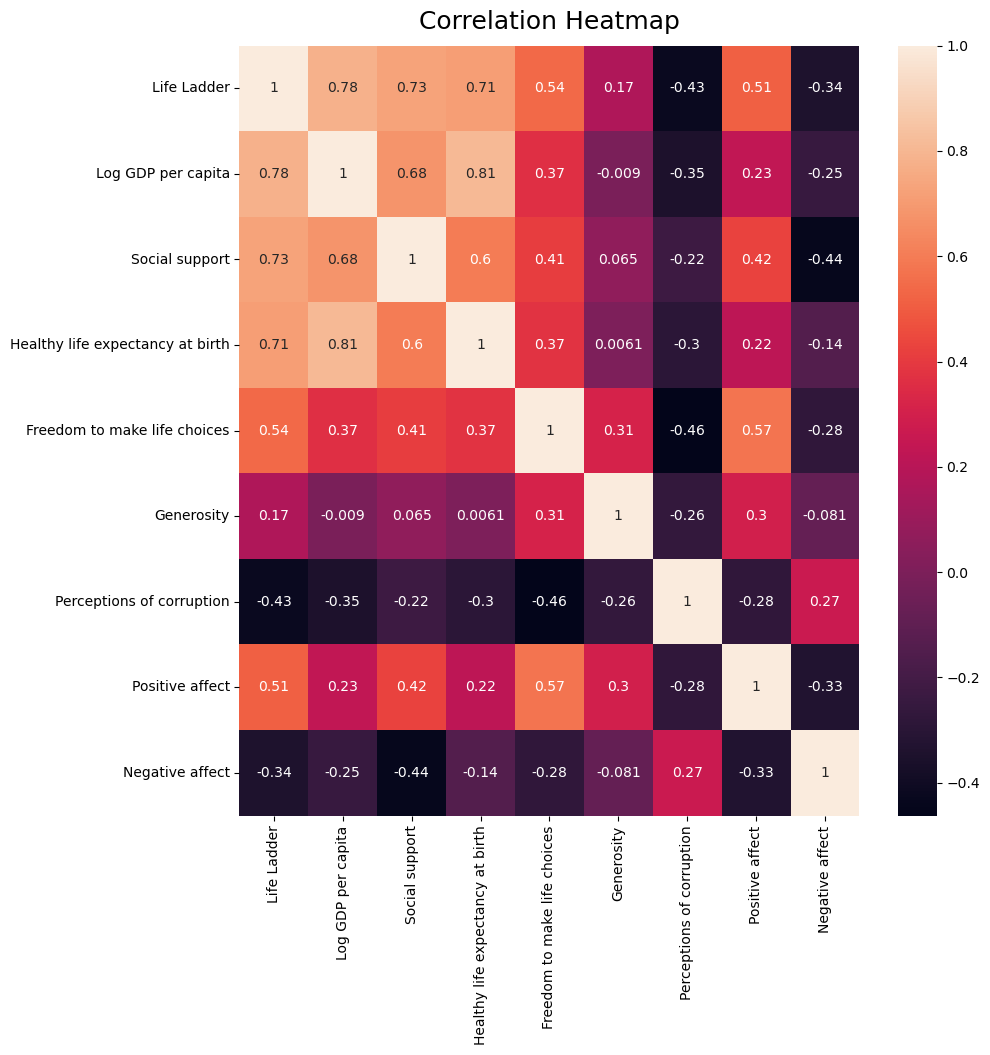

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax)
corr.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# Save figure
plt.savefig("heatmap.png")

In [14]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\hachl\\11-2023 World Happiness Project'

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
This plot visualises the correlation matrix, which indicates the level of interdependence between the variables. The coefficients range between -1 and 1 (with -1 being a perfect negative relationship, 0 indicating no relationship, and 1 being a perfect positive relationship). In this case, the 'Life Ladder' is our dependent variable, while any variables that impact the individual wellbeing are the independent variables.

The strongest correlations are between 'Life Ladder' & the 5 variables 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Positive affect': their coefficients are between 0.51 - 0.78, exhibiting a medium-to-strong positive correlation. So the higher the independent variable, the higher our dependent variable (e.g. the higher the freedome of choice, the higher the happiness).

### SCATTERPLOTS

Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.

- Life ladder       & GDP, Social support, Healthy life expectancy, Freedom, Positive affect

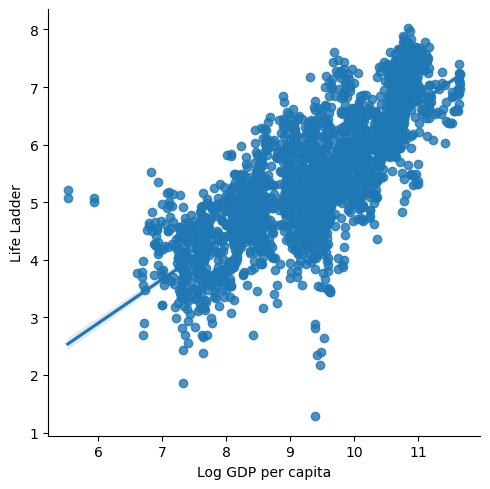

In [15]:
# Create a scatterplot for the "Log GDP per capita" and "Life Ladder" columns in seaborn

sns.lmplot(x = 'Log GDP per capita', y = 'Life Ladder', data = df)

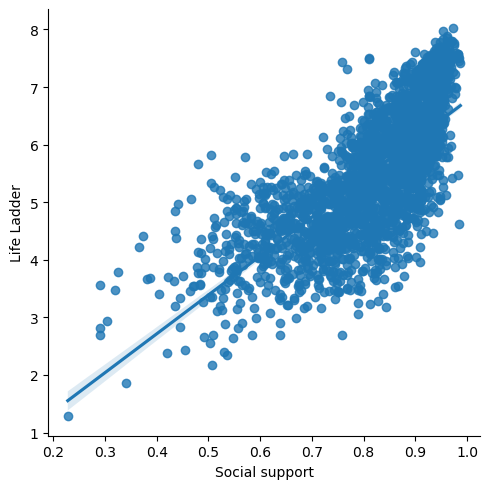

In [16]:
# Create a scatterplot for the "Social support" and "Life Ladder" columns in seaborn

sns.lmplot(x = 'Social support', y = 'Life Ladder', data = df)

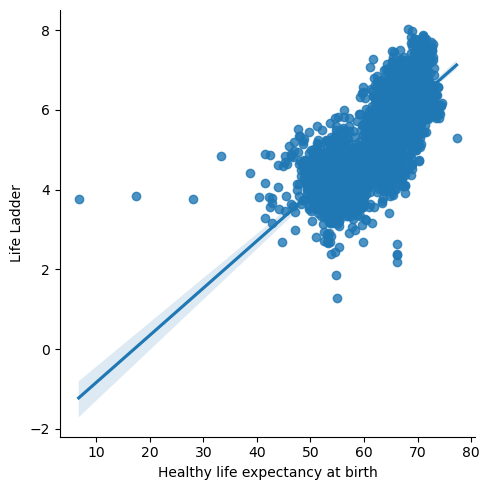

In [20]:
# Create a scatterplot for the "Healthy Life expectancy at birth" and "Life Ladder" columns in seaborn

sns.lmplot(x = 'Healthy life expectancy at birth', y = 'Life Ladder', data = df)

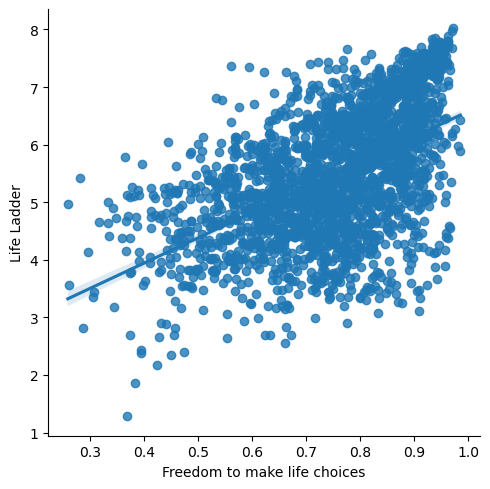

In [21]:
# Create a scatterplot for the "Freedom to make life choices" and "Life Ladder" columns in seaborn

sns.lmplot(x = 'Freedom to make life choices', y = 'Life Ladder', data = df)

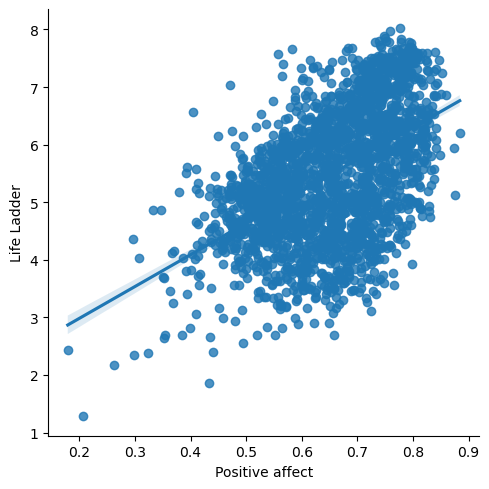

In [22]:
# Create a scatterplot for the "Positive affect" and "Life Ladder" columns in seaborn

sns.lmplot(x = 'Positive affect', y = 'Life Ladder', data = df)

### The plots show visually that the first 3 variables have a stronger positive correlation with our dependent 'Life ladder' as the data points cluster more around the line. They show an upward linear trend with few outliers.

### PAIR PLOTS


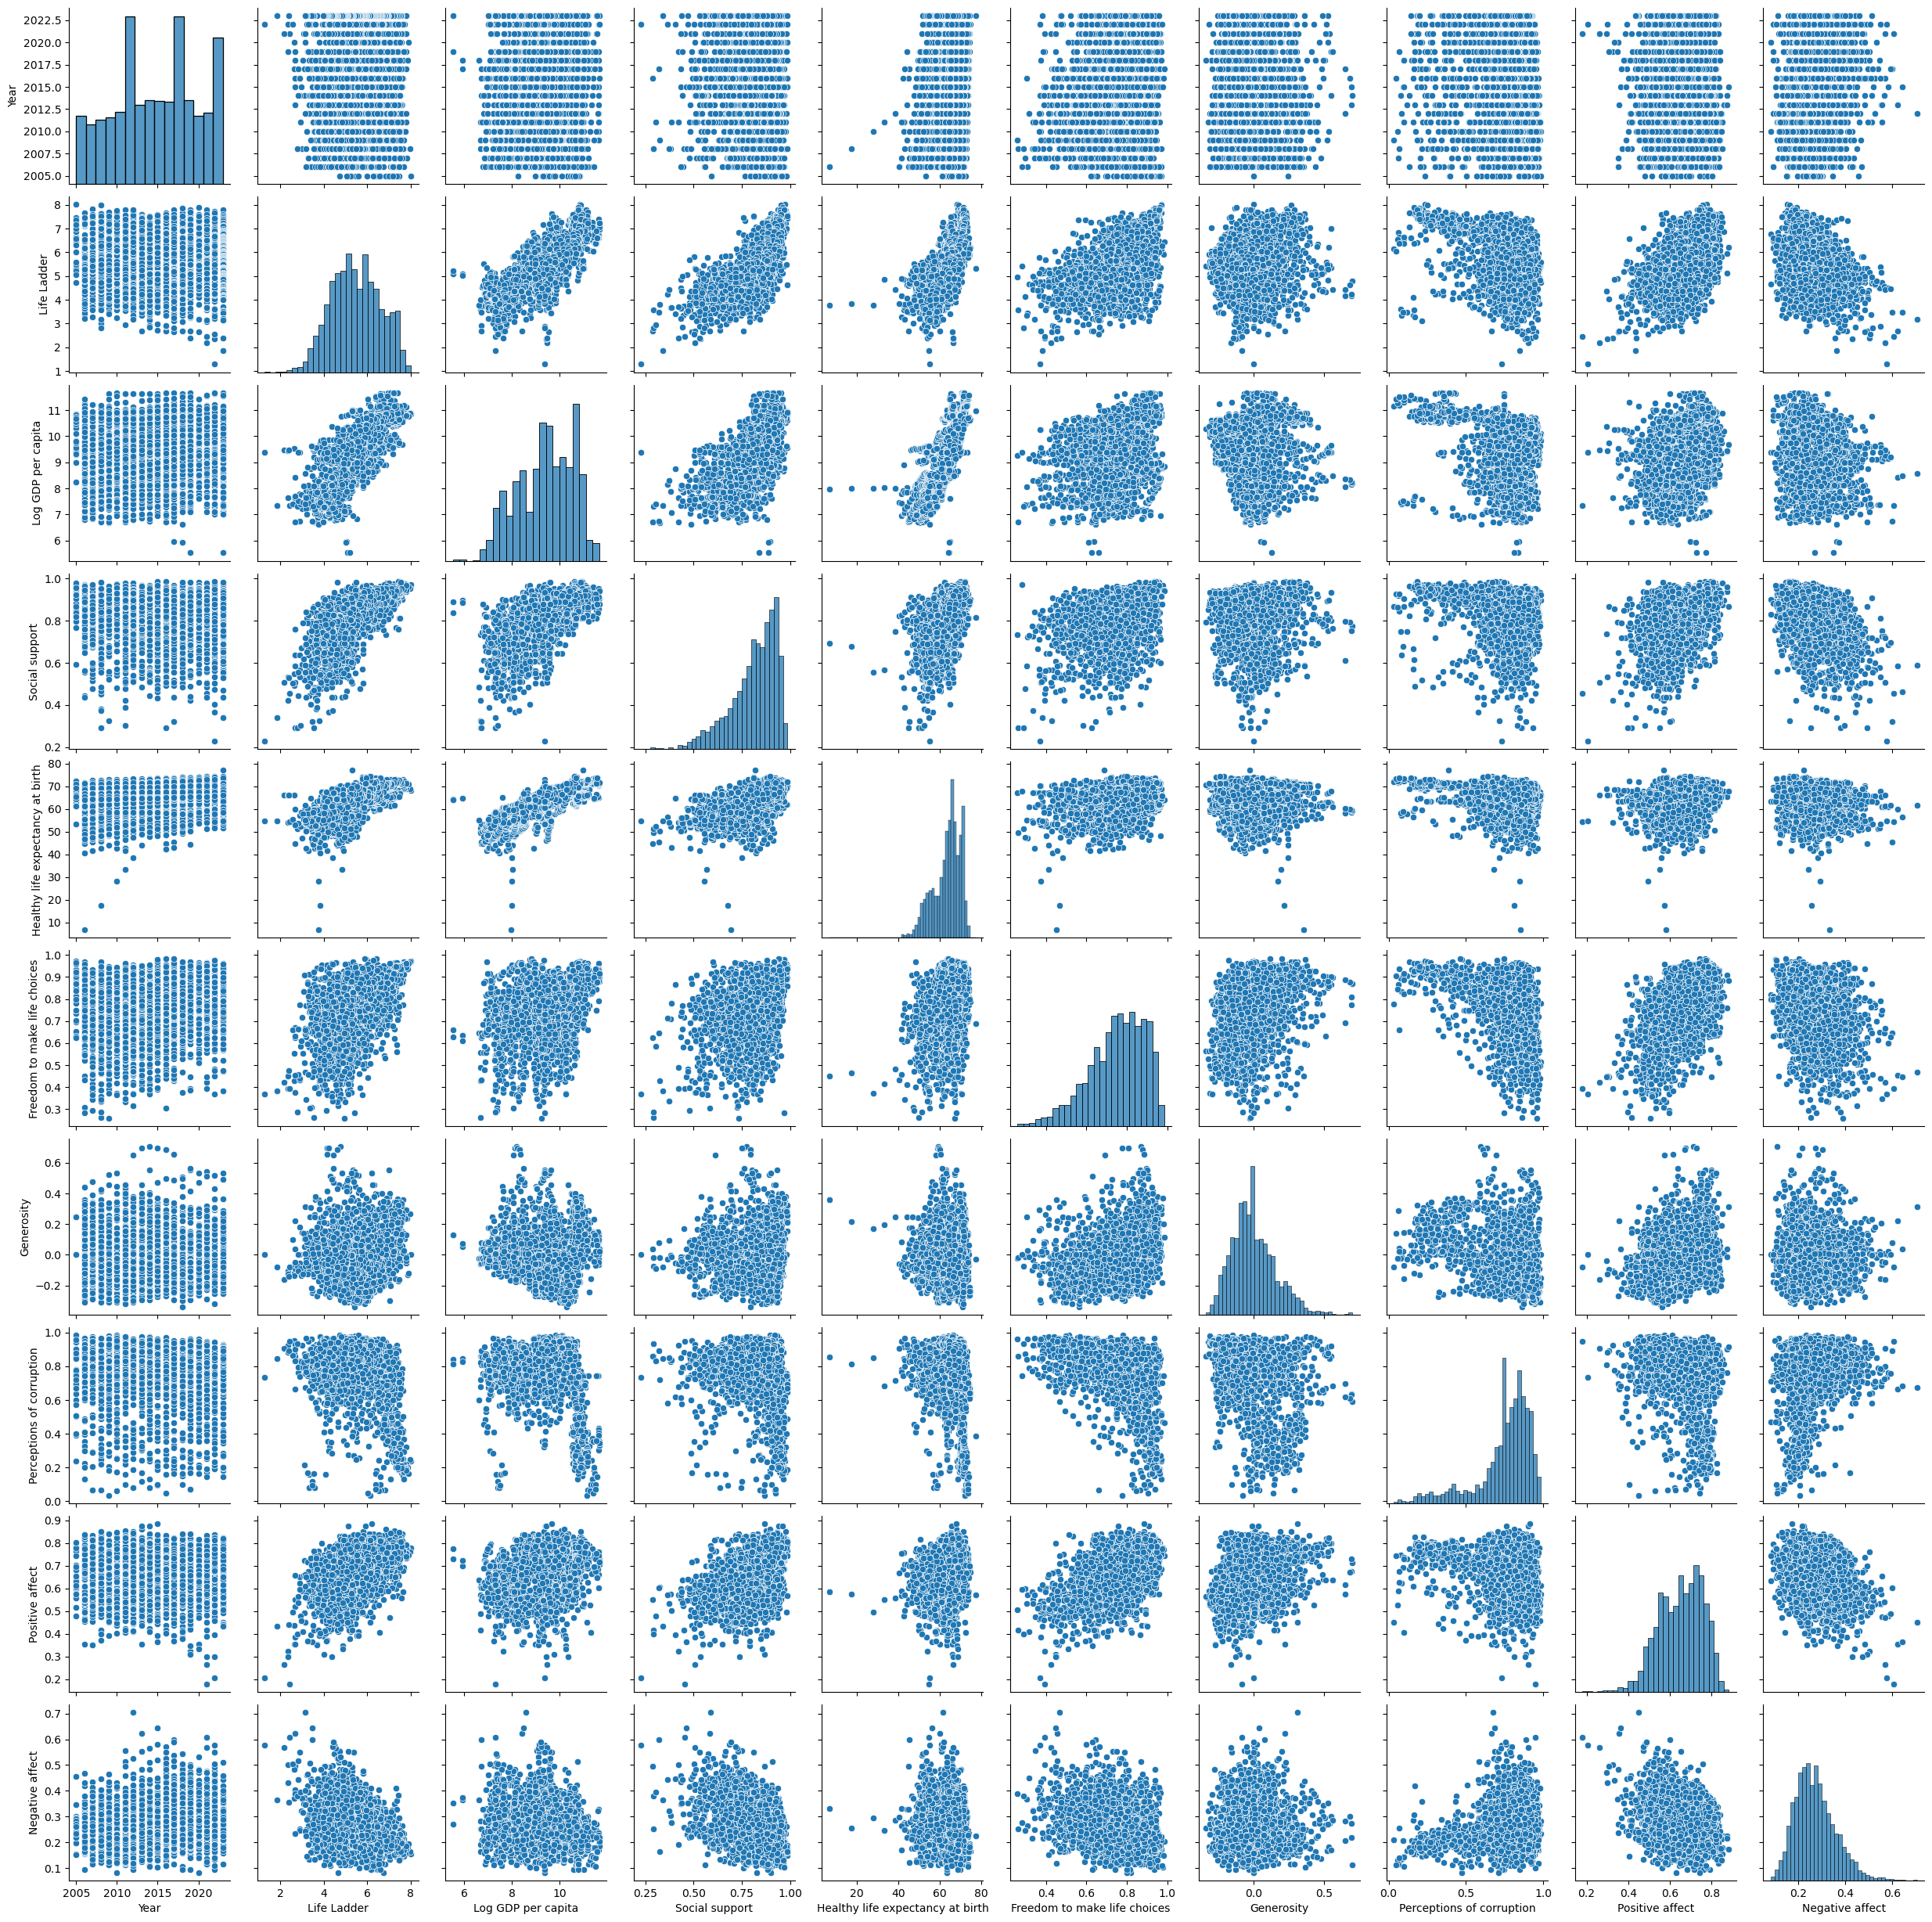

In [23]:
# Create a pair plot of the entire data set

g = sns.pairplot(df)

### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

This pair plot shows us the distribution of all numeric variables while also creating scatterplots for every variable crossed with every other variable. Let’s consider the bottom row for example, where each variable is crossed with 'Negative affect': the scatterplots show no consistent trends, except for a mid negative correlation with 'Social support' that seem to indicate that the higher the support an individual has, the less worry/sadness/anger they experience. In fact the scatteplot right above it confirms this relationship: an upward trend where the higher the support, the higher the positive affect.

For further analysis, I will focus on the previously discussed variables in relation to 'Life ladder':
- GDP per capita
- Social Support
- Healthy life expectancy

### CATEGORICAL PLOTS

Create a categorical plot and interpret the results.

<Axes: xlabel='Generosity', ylabel='Count'>

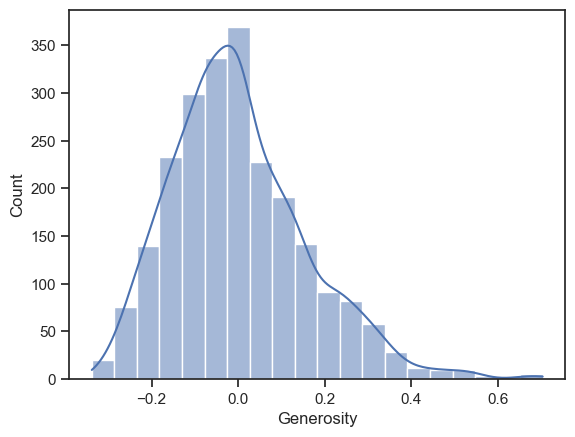

In [30]:
# Creating a categorical variable that splits the "Generosity" column into categories

sns.histplot(df['Generosity'], bins = 20, kde = True)

In [31]:
df.loc[df['Generosity'] < -0.2, 'Generosity category'] = 'Low Generosity'

In [32]:
df.loc[(df['Generosity'] >= -0.2) & (df['Generosity'] < 0.2), 'Generosity category'] = 'Mid Generosity'

In [33]:
df.loc[df['Generosity'] >= 0.2, 'Generosity category'] = 'High Generosity'

In [34]:
df['Generosity category'].value_counts(dropna = False)

Generosity category
Mid Generosity     1879
High Generosity     273
Low Generosity      184
Name: count, dtype: int64

In [35]:
df.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Generosity category'],
      dtype='object')

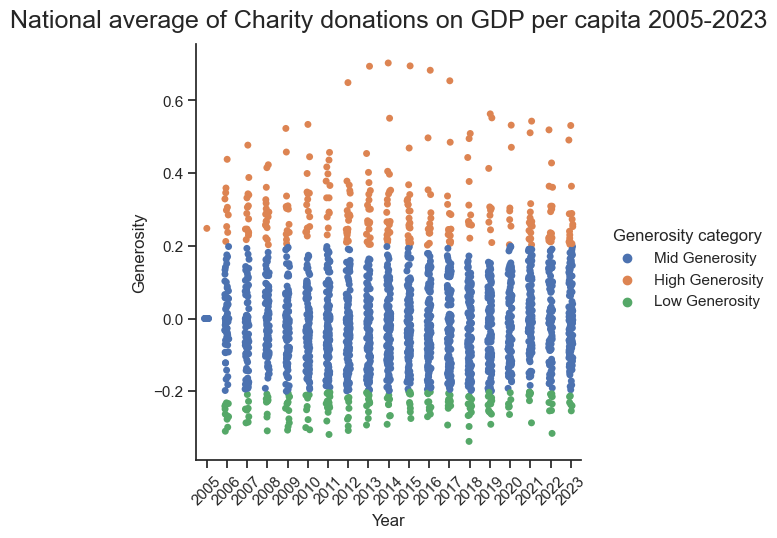

In [59]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Year", y="Generosity", hue="Generosity category", data=df)

plt.title('National average of Charity donations on GDP per capita 2005-2023', fontdict={'fontsize':18}, pad=12)
plt.xticks(rotation=45)

# save figure in directory
g.savefig("catplot.png") 


#### Insight: worldwide generosity is pretty consistent over the years, with a slight peak between 2012-2017. For the most part, nations fit in the 'Mid Generosity' category, it would be insteresting to check whether geolocation displays the same trend. 

## 04. Key questions & Hypothesis formulation

### Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far. 

- Are the countries with highest GDP the happiest (and viceversa)? 
* THERE IS A STRONG POSITIVE RELATIONSHIP BETWEEN INDIVIDUAL HAPPINESS AND GDP PER CAPITA. WE NEED TO INCLUDE COUNTRIES IN THE ANALYSIS.
- How does freedom of choice play on the ranking? Are the richest counties also the most free? 
* THERE IS A WEAK UPWARD TREND BETWEEN GDP PER CAPITA AND FREEDOM OF CHOICE, WHICH SEEM THAT NATIONAL PRODUCTION AND FREEDOM DON'T GO HAND IN HAND.
- Are the happiest countries the most charitable ones? 
* THERE SEEMS TO BE NO RELATIONSHIP BETWEEN NATIONAL GENEROSITY AND HAPPINESS.
- Does social support affect positive and negative affect variables? 
* YES, THE MORE SUPPORT AN INDIVIDUAL HAS, THE MORE ENJOYMENT THEY EXPERIENCE.
- Does perceived corruption in bureacracy/businesses affect individual well-being? 
* THERE IS A WEAK NEGATIVE TREND BETWEEN THE TWO VARIABLES: THE LESS CORRUPTION IS PERCEIVED, THE HIGHER THE HAPPINESS RATE.


### Define any hypotheses that you can at this point. You’ll be testing these later on.

As stated, my analyses will focus on the 3 variables GDP per capita, Social Support, and Healthy life expectancy which have the strongest correlations to 'Life ladder'. 

- Hypothesis 1: the richer a country is, the happier its people.
- Hypothesis 2: the more social support individuals have, the happier they are.
- Hypothesis 3: the higher the age of a healthy life expectancy, the happier the nation is.
